# Analysising how the ACA changed Insurance for the Uninsured

### In my project I am wanting to take a look at how the Affordable Care Act changed insurance for the uninsured in the United States. The questions that I want to answer are: What are the top 5 states with the highest uninsured rate drop? What state had the biggest change in insurance coverage from 2010 to 2015? What state had the highest average monthly tax credit in 2016?

CODE imports the necessary libraries

In [1]:
import os
import sqlite3
import csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

CODE to create database and table within the database.

In [2]:
conn = sqlite3.connect('aca_data.db')

aca_data = pd.read_csv('states_new.csv')

aca_data.to_sql('aca_data', conn, if_exists ='replace')

CODE to retrieve data from SQL database into a python object.

In [3]:
df = pd.read_sql_query("""SELECT * FROM aca_data""", conn)

## Original Database

In [4]:
df

,index,State,Uninsured_Rate_2010,Uninsured_Rate_2015,Uninsured_Rate_Change_2010_2015,Health_Insurance_Coverage_Change_2010_2015,Employer_Health_Insurance_Coverage_2015,Marketplace_Health_Insurance_Coverage_2016,Marketplace_Tax_Credits_2016,Average_Monthly_Tax_Credit_2016,State_Medicaid_Expansion_2016,Medicaid_Enrollment_2013,Medicaid_Enrollment_2016,Medicaid_Enrollment_Change_2013_2016,Medicare_Enrollment_2016
0,0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,$310,0.0,799176.0,910775,111599.0,989855
1,1,Alaska,19.9,14.9,-5.0,36000,390000,17995,16205,$750,1.0,122334.0,166625,44291.0,88966
2,2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,$230,1.0,1201770.0,1716198,514428.0,1175624
3,3,Arkansas,17.5,9.5,-8.0,234000,1365000,63357,56843,$306,1.0,556851.0,920194,363343.0,606146
4,4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,$309,1.0,7755381.0,11843081,4087700.0,5829777
5,5,Colorado,15.9,8.1,-7.8,419000,2949000,108311,67062,$318,1.0,783420.0,1375264,591844.0,820234
6,6,Connecticut,9.1,6.0,-3.1,110000,2148000,102917,80759,$357,1.0,NaN,761137,NaN,644136
7,7,Delaware,9.7,5.9,-3.8,35000,564000,25379,21467,$330,1.0,223324.0,236702,13378.0,186835
8,8,District of Columbia,7.6,3.8,-3.8,25000,388000,17666,1224,$183,1.0,235786.0,255491,19705.0,90492
9,9,Florida,21.3,13.3,-8.0,1597000,8847000,1531714,1428712,$305,0.0,3104996.0,3644673,539677.0,4149593


In [5]:
df.rename(
    columns={
        'State':'State',
        'Uninsured_Rate_2010': 'Uninsured 2010',
        'Uninsured_Rate_2015': 'Uninsured 2015',
        'Uninsured_Rate_Change_2010_2015': 'Uninsured Rate Change 2010 to 2015', 
        'Health_Insurance_Coverage_Change_2010_2015': 'Insurance Coverage Change 2010 to 2015', 
        'Employer_Health_Insurance_Coverage_2015': 'Employer coverage 2015', 
        'Marketplace_Health_Insurance_Coverage_2016': 'Marketplace Coverage 2016', 
        'Marketplace_Tax_Credits_2016': 'Marketplace Tax Credits 2016',
        'Average_Monthly_Tax_Credit_2016': 'Average Monthly Tax Credit 2016',
        'State_Medicaid_Expansion_2016': 'State Medicaid Expansion 2016',
        'Medicaid_Enrollment_2013': 'Medicaid Enrollment 2013',
        'Medicaid_Enrollment_2016': 'Medicaid Enrollment 2016',
        'Medicaid_Enrollment_Change_2013_2016':'Medicaid Enrollment Change 2013 to 2016',
        'Medicare_Enrollment_2016': 'Medicare Enrollment 2016'
        
        
    }, 
    inplace=True)

# Transformed Database

In [6]:
df

,index,State,Uninsured 2010,Uninsured 2015,Uninsured Rate Change 2010 to 2015,Insurance Coverage Change 2010 to 2015,Employer coverage 2015,Marketplace Coverage 2016,Marketplace Tax Credits 2016,Average Monthly Tax Credit 2016,State Medicaid Expansion 2016,Medicaid Enrollment 2013,Medicaid Enrollment 2016,Medicaid Enrollment Change 2013 to 2016,Medicare Enrollment 2016
0,0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,$310,0.0,799176.0,910775,111599.0,989855
1,1,Alaska,19.9,14.9,-5.0,36000,390000,17995,16205,$750,1.0,122334.0,166625,44291.0,88966
2,2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,$230,1.0,1201770.0,1716198,514428.0,1175624
3,3,Arkansas,17.5,9.5,-8.0,234000,1365000,63357,56843,$306,1.0,556851.0,920194,363343.0,606146
4,4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,$309,1.0,7755381.0,11843081,4087700.0,5829777
5,5,Colorado,15.9,8.1,-7.8,419000,2949000,108311,67062,$318,1.0,783420.0,1375264,591844.0,820234
6,6,Connecticut,9.1,6.0,-3.1,110000,2148000,102917,80759,$357,1.0,NaN,761137,NaN,644136
7,7,Delaware,9.7,5.9,-3.8,35000,564000,25379,21467,$330,1.0,223324.0,236702,13378.0,186835
8,8,District of Columbia,7.6,3.8,-3.8,25000,388000,17666,1224,$183,1.0,235786.0,255491,19705.0,90492
9,9,Florida,21.3,13.3,-8.0,1597000,8847000,1531714,1428712,$305,0.0,3104996.0,3644673,539677.0,4149593


### 1. What are the top 5 states with the highest uninsured rate drop?

In [11]:
df.sort_values(by="Uninsured Rate Change 2010 to 2015", ascending=True)

,index,State,Uninsured 2010,Uninsured 2015,Uninsured Rate Change 2010 to 2015,Insurance Coverage Change 2010 to 2015,Employer coverage 2015,Marketplace Coverage 2016,Marketplace Tax Credits 2016,Average Monthly Tax Credit 2016,State Medicaid Expansion 2016,Medicaid Enrollment 2013,Medicaid Enrollment 2016,Medicaid Enrollment Change 2013 to 2016,Medicare Enrollment 2016
28,28,Nevada,22.6,12.3,-10.3,294000,1505000,79876,71472,$268,1.0,332560.0,614298,281738.0,471747
37,37,Oregon,17.1,7.0,-10.1,403000,2070000,131167,95507,$253,1.0,626356.0,1021862,395506.0,784032
4,4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,$309,1.0,7755381.0,11843081,4087700.0,5829777
17,17,Kentucky,15.3,6.0,-9.3,404000,2316000,74640,56488,$258,1.0,606805.0,1220788,613983.0,881938
31,31,New Mexico,19.6,10.9,-8.7,178000,884000,47497,32703,$212,1.0,457678.0,766732,309054.0,385918
48,48,West Virginia,14.6,6.0,-8.6,156000,976000,33235,29163,$388,1.0,354544.0,575645,221101.0,423500
3,3,Arkansas,17.5,9.5,-8.0,234000,1365000,63357,56843,$306,1.0,556851.0,920194,363343.0,606146
9,9,Florida,21.3,13.3,-8.0,1597000,8847000,1531714,1428712,$305,0.0,3104996.0,3644673,539677.0,4149593
5,5,Colorado,15.9,8.1,-7.8,419000,2949000,108311,67062,$318,1.0,783420.0,1375264,591844.0,820234
47,47,Washington,14.2,6.6,-7.6,537000,3986000,158245,110476,$238,1.0,1117576.0,1788536,670960.0,1238649


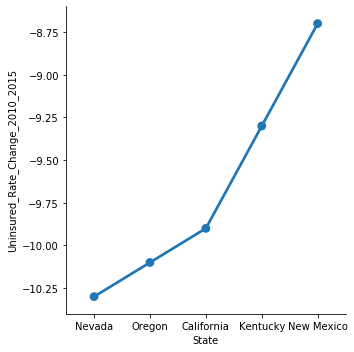

In [88]:
sns.catplot(
    x="State",
    y="Uninsured_Rate_Change_2010_2015",
    data=df,
    kind="point",
    height=5,
    aspect=1,
    order= ('Nevada', 'Oregon', 'California', 'Kentucky', 'New Mexico'),
)

As you can see from the Database, the top 5 states with the highest rate drop are: 
1.Nevada
2.Oregon 
3.California 
4.Kentucky
5.New Mexico

### What state had the biggest change in insurance coverage from 2010 to 2015?

In [121]:
database = pd.read_sql_query("""
    SELECT 
        State,
        Health_Insurance_Coverage_Change_2010_2015
        FROM aca_data
""", conn)

In [122]:
database

,State,Health_Insurance_Coverage_Change_2010_2015
0,Alabama,215000
1,Alaska,36000
2,Arizona,410000
3,Arkansas,234000
4,California,3826000
5,Colorado,419000
6,Connecticut,110000
7,Delaware,35000
8,District of Columbia,25000
9,Florida,1597000


In [94]:
database.sort_values(by="Health_Insurance_Coverage_Change_2010_2015", ascending=False)

,State,Health_Insurance_Coverage_Change_2010_2015
51,United States,19304000
4,California,3826000
43,Texas,1781000
9,Florida,1597000
32,New York,939000
13,Illinois,850000
35,Ohio,664000
22,Michigan,618000
10,Georgia,581000
33,North Carolina,552000


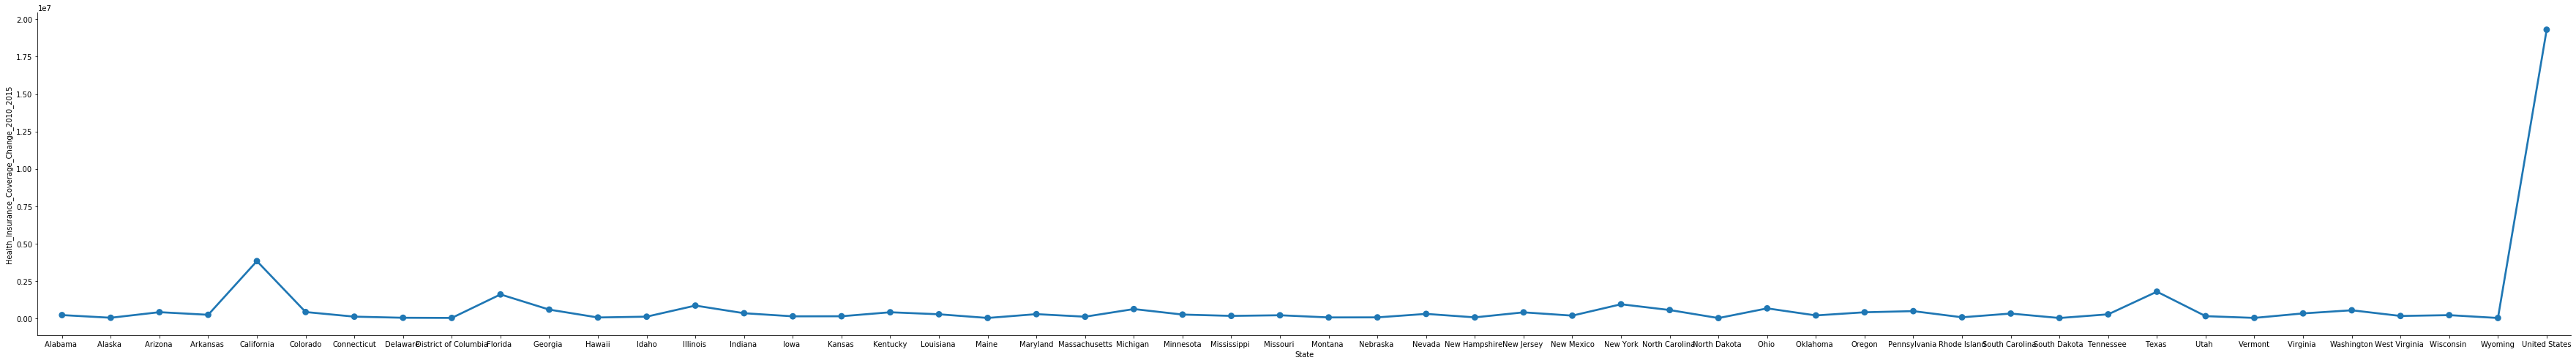

In [117]:
sns.catplot(
    x="State",
    y="Health_Insurance_Coverage_Change_2010_2015",
    data=database,
    kind="point",
    height=7,
    aspect=7,
)

### What state had the highest average monthly tax credit in 2016?

In [99]:
tax = pd.read_sql_query("""
    SELECT 
        State,
        Average_Monthly_Tax_Credit_2016
    FROM aca_data
""", conn)

In [100]:
tax

,State,Average_Monthly_Tax_Credit_2016
0,Alabama,$310
1,Alaska,$750
2,Arizona,$230
3,Arkansas,$306
4,California,$309
5,Colorado,$318
6,Connecticut,$357
7,Delaware,$330
8,District of Columbia,$183
9,Florida,$305


In [101]:
tax.sort_values(by="Average_Monthly_Tax_Credit_2016", ascending=False)

,State,Average_Monthly_Tax_Credit_2016
1,Alaska,$750
50,Wyoming,$459
33,North Carolina,$401
48,West Virginia,$388
18,Louisiana,$362
6,Connecticut,$357
19,Maine,$342
49,Wisconsin,$332
7,Delaware,$330
30,New Jersey,$322


In [104]:
sns.catplot(
    x="State",
    y="Average_Monthly_Tax_Credit_2016",
    data=tax,
    kind="point",
    height=5,
    aspect=2,
    order= ('Alaska', 'Wyoming', 'North Carolina', 'West Virginia', 'Louisiana'),
)

ValueError: Neither the `x` nor `y` variable appears to be numeric.